In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from denn import *

In [55]:
ab = pd.read_csv('../data/medium/dC_01.csv', header=None).values[0]
bestKnow = pd.read_csv('../data/medium/Best_Know1Fxs.csv', header=None).values[0]
bestKnow = bestKnow[:100].astype(float)
java_results = pd.read_csv('../data/medium/Feasibility1Fs.csv', header=None).values[0]
java_results = java_results[:-1].astype(float)
java_results_all = pd.read_csv('../data/medium/Feasibility1Fs.csv', header=None).iloc[:,:-1]

In [5]:
D = 30
frequency = 1_000
max_times = len(ab)
total_generations = max_times * frequency + 1000

def fitness_func(indiv): return (indiv.data**2).sum()
def constraint_func(indiv, b): return -b + sum((1/np.sqrt(D))*indiv.data)

population = Population.new_random(dimension=D)
opt = Optimization(population, fitness_func, constraint_func, constraint_params=[ab],
                   max_times=max_times, frequency=frequency, callbacks=DynamicConstraint)
opt.state_dict

{'gen': 0, 'evals': 0, 'time': 0, 'best': None}

In [30]:
opt.population.individuals[0]

Individual(dimensions=30, lower_limit=-5, upper_limit=5, idx=0, gen=4998, fitness_value=1.0663267454045264e-14, constraints=[-91.2860000092961], constraints_sum=0.0, is_feasible=True, data=array([-1.65623042e-08,  1.75475277e-08,  2.96115368e-09,  2.06808572e-08,
        1.49567532e-08,  5.29907759e-09, -3.43508544e-08, -5.09729208e-09,
        7.80838405e-09, -1.76503710e-08,  3.36536456e-08, -2.38251095e-08,
       -3.57260408e-08,  2.42222411e-08, -1.09354549e-08, -1.81400877e-08,
        9.71384422e-09, -7.02988681e-09, -2.87100329e-09,  1.60716794e-08,
        6.67664403e-09,  2.88078436e-09, -1.59286939e-08,  1.30531973e-08,
       -3.87164241e-08,  7.83548980e-09,  1.29516113e-08,  1.93675104e-08,
       -2.31468667e-08, -1.66168375e-08]))

A proper report should be shown here :)
Total time: 00:14


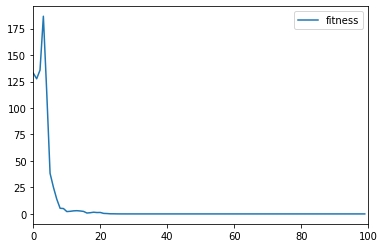

In [6]:
opt.run(total_generations)

In [62]:
df = pd.DataFrame({'java':java_results, 'bestKnow':bestKnow[:-1], 'results': opt.recorder.best_times_fitness[:-1]})

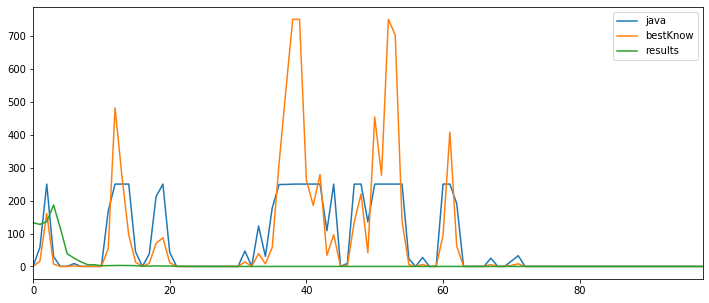

In [69]:
df.plot(figsize=(12,5))

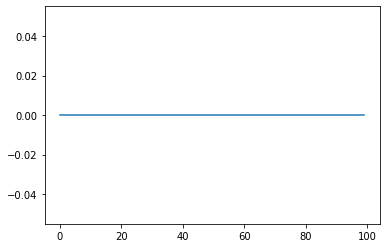

In [73]:
plt.plot([e.constraints_sum for e in opt.recorder.best_times])

# Multiple runs

In [95]:
runs = (Optimization(population, fitness_func, constraint_func, constraint_params=[ab],
                     max_times=max_times, frequency=frequency, callbacks=DynamicConstraint)
        .create_multiple_runs(n_runs=10))

In [96]:
runs.run(total_generations)

Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.


In [97]:
runs.times_data

,run_1,run_2,run_3,run_4,run_5,run_6,run_7,run_8,run_9,run_10
0,1.088545e+02,1.868152e+02,1.134213e+02,1.010666e+02,1.399932e+02,1.766048e+02,1.416757e+02,1.602052e+02,1.920948e+02,1.888804e+02
1,1.555127e+02,1.743810e+02,1.529124e+02,1.403133e+02,1.577302e+02,1.143497e+02,1.249098e+02,1.466144e+02,1.819073e+02,2.241503e+02
2,1.345406e+02,8.784957e+01,9.463213e+01,1.455394e+02,1.537559e+02,1.856516e+02,1.711152e+02,1.074757e+02,2.360713e+02,2.286539e+02
3,1.491220e+02,1.732542e+02,1.459061e+02,1.441226e+02,1.077743e+02,1.522761e+02,1.861286e+02,7.945890e+01,2.447248e+02,2.065709e+02
4,5.802458e+01,8.570077e+01,8.669309e+01,5.221702e+01,5.915346e+01,1.092227e+02,8.672468e+01,5.180283e+01,8.405733e+01,1.038508e+02
5,2.835226e+01,4.407771e+01,2.876175e+01,4.683306e+01,2.547166e+01,5.959892e+01,5.357031e+01,2.518224e+01,4.447619e+01,3.044435e+01
6,2.543610e+01,4.002777e+01,3.526642e+01,2.809118e+01,3.489981e+01,4.312177e+01,4.828967e+01,3.543385e+01,3.761063e+01,3.216881e+01
7,2.797271e+01,2.102434e+01,1.870840e+01,1.994870e+01,1.769730e+01,1.265665e+01,4.333024e+01,1.256500e+01,2.384195e+01,2.089458e+01
8,1.196963e+01,1.519528e+01,6.315521e+00,7.995009e+00,7.142034e+00,9.921629e+00,1.314342e+01,8.550067e+00,1.144115e+01,1.205839e+01
9,3.343855e+00,5.507218e+00,4.584134e+00,4.531476e+00,4.602520e+00,6.364625e+00,1.010731e+01,5.354390e+00,8.623286e+00,9.852592e+00


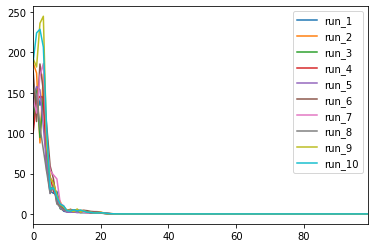

In [98]:
runs.times_data.plot();

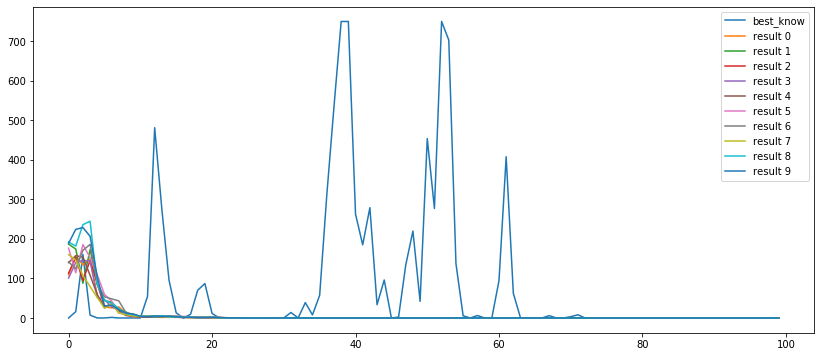

In [100]:
plt.figure(figsize=(14,6))
plt.plot(bestKnow, '-', label='best_know')
for i,opt in enumerate(runs.optimizations):
    plt.plot(opt.recorder.best_times_fitness, '-', label=f'result {i}')
plt.legend()

# --